In [ ]:
# Requirements - qiskit
!pip install qiskit

In [4]:


from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import *

# Three-Step process : Encode the input, do computation, and extract output

#Exercise 1 - Draw a circuit with 6 qubits, 6 output bits and one-one measure.

n_qubit = 6
n_output = n_qubit
circuit_1 = QuantumCircuit(n_qubit, n_output)
   
for i in range(6):
  circuit_1.measure(i,i)

  
circuit_1.draw()



┌─┐               
q_0: ┤M├───────────────
     └╥┘┌─┐            
q_1: ─╫─┤M├────────────
      ║ └╥┘┌─┐         
q_2: ─╫──╫─┤M├─────────
      ║  ║ └╥┘┌─┐      
q_3: ─╫──╫──╫─┤M├──────
      ║  ║  ║ └╥┘┌─┐   
q_4: ─╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║ └╥┘┌─┐
q_5: ─╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║ └╥┘
c: 6/═╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5

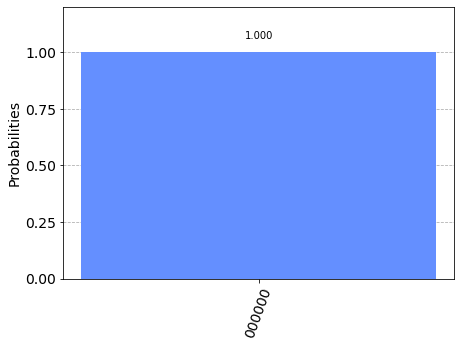

In [6]:
counts =  execute(circuit_1, Aer.get_backend('qasm_simulator')).result()
plot_histogram(counts.get_counts())

In [51]:
#Creating an Adder Circuit 

# NOT Gate for Qubits is performed by function x

n=5

circuit_2 = QuantumCircuit(n,n)
# There are 5 qubits. The next line specifies to NOT the thrid qubit

circuit_2.x(3)

circuit_2.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
q_4: ─────
          
c: 5/═════

In [52]:
for l in range(n):
  circuit_2.measure(l,l)






circuit_2.draw()

┌─┐         
q_0: ─────┤M├─────────
          └╥┘┌─┐      
q_1: ──────╫─┤M├──────
           ║ └╥┘┌─┐   
q_2: ──────╫──╫─┤M├───
     ┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ X ├─╫──╫──╫─┤M├
     └┬─┬┘ ║  ║  ║ └╥┘
q_4: ─┤M├──╫──╫──╫──╫─
      └╥┘  ║  ║  ║  ║ 
c: 5/══╩═══╩══╩══╩══╩═
       4   0  1  2  3

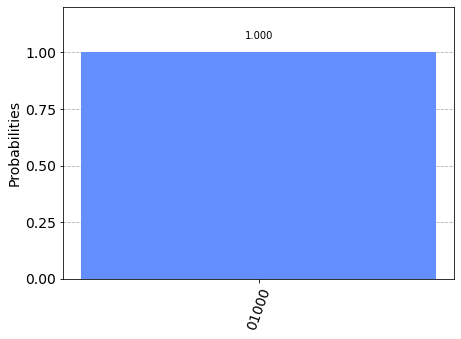

In [55]:

counts_2 = execute(circuit_2, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_2)

# Notice - Qiskit numbers the bit in a string from right to left



In [56]:
print("We wrote 2^3 in a 5-simple bit computer")

We wrote 2^3 in a 5-simple bit computer


**Qubit Half Adder Cicuit Diagram**


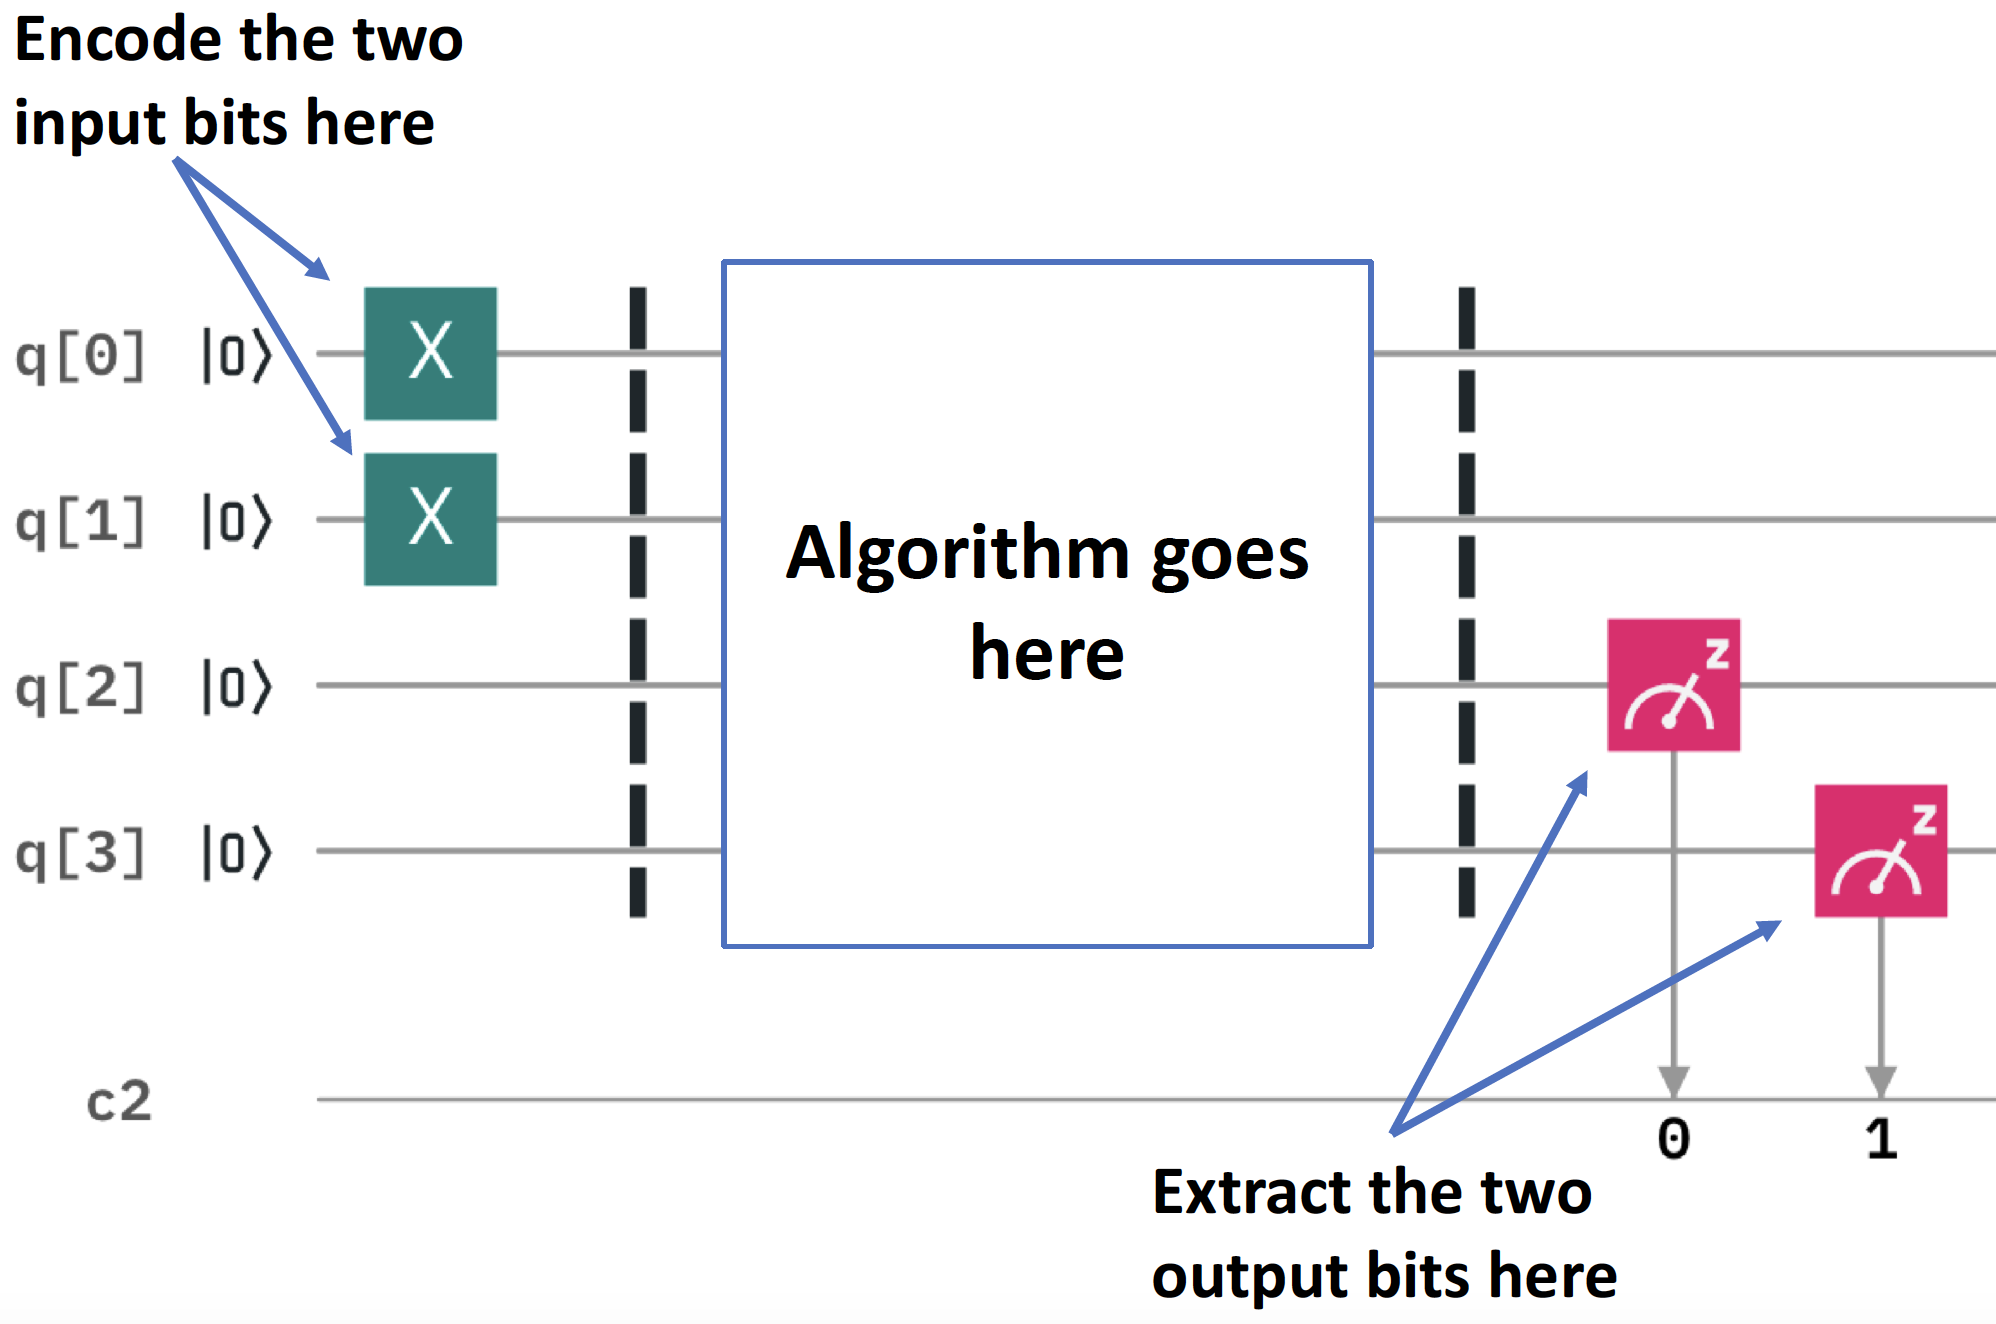

**Let's start**


In [69]:
# Role of XOR for rightmost bit (whether two input bits are different or not =) is done by CNOT gate, or controlled-NOT gate.
#Function for this in Qiskit is cx

circuit_3 = QuantumCircuit(3,3)
circuit_3.x(2)
circuit_3.x(1)

# 1 XOR 1 is 0 . Result is stored in the target quibit (one with bigger circle/square)
circuit_3.cx(1,2)

for m in range(3):
  circuit_3.measure(m,m)

circuit_3.draw()



┌─┐           
q_0: ─────┤M├───────────
     ┌───┐└╥┘     ┌─┐   
q_1: ┤ X ├─╫───■──┤M├───
     ├───┤ ║ ┌─┴─┐└╥┘┌─┐
q_2: ┤ X ├─╫─┤ X ├─╫─┤M├
     └───┘ ║ └───┘ ║ └╥┘
c: 3/══════╩═══════╩══╩═
           0       1  2

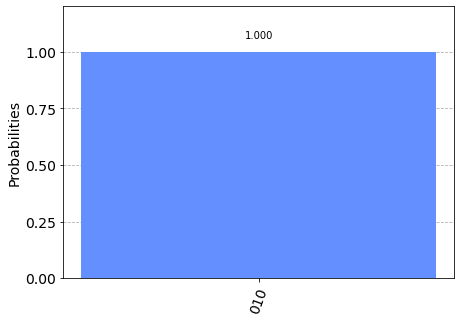

In [68]:
counts_3 = execute(circuit_3, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_3)



In [70]:
# The need for something not CNOT gate
circuit_4 = QuantumCircuit(2,2)
#Input is 01. Reading from right to left
circuit_4.x(0)
#Input is for CNOT gate
circuit_4.cx(0,1)
# Format of this function is ----> circuit_4.cx(control_qubit, target_qubit)
# Basically, it does ---> NOT on the target if control is 1

circuit_4.measure(0,0)
circuit_4.measure(1,1)

circuit_4.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

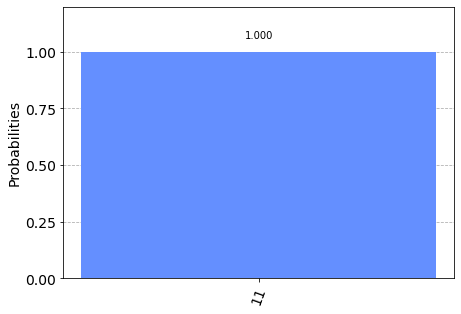

In [71]:
#Finding the output

counts_4 = execute(circuit_4, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_4)

In [73]:
#We need to solve this issue. We don't wish to override the existing input bits

circuit_ha_1 = QuantumCircuit(4, 2)
#Encoding as required. Let's try this for the above example - 01
circuit_ha_1.x(0)

#Introducing Barriers
circuit_ha_1.barrier()


# NOTE = PERFORMING XOR WITH ANY INPUT BIT 0 OR 1 RESULTS IN THE SAME BIT.
# HENCE, NOTE THE OPERATION WE PERFORM. We copy the input bits to third qubits (first output bit)
# and then perform XOR. 

#use cnots to write XOR of the inputs on qubit 2
circuit_ha_1.cx(0,2) #Input bit 1 copied to third qubit by performing cnot with it
circuit_ha_1.cx(1,2) #Input bit 2 is cnot with third qubit, containing value of first input bit. Result stored in it only. 
circuit_ha_1.barrier()

#extracting outputs
circuit_ha_1.measure(2, 0) #extract XOR value
circuit_ha_1.measure(3,1)

circuit_ha_1.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     └───┘ ░   │        ░       
q_1: ──────░───┼────■───░───────
           ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [ ]:
# Half-way there !
# If we notice, the second output bit will always remain zero for all cases. 
# We know that for our half-adder, there exists one case where the second output bit is one
# This case is 1+1 = 10  (in decimal 1+1=2 )

#Our Method - If both the input bits are 1, then output is 1. It resembles a CNOT for two qubits... or simply speaking a simple AND (a cnot for two bits)
# AND in qubits is the famous "TOfolli gate"
# Function is ccx

**Let's build finally the  - Quantum Half Adder**

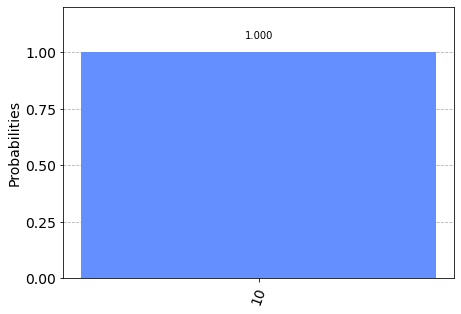

In [76]:
half_adder = QuantumCircuit(4, 2)
#Input - 11
half_adder.x(0)
half_adder.x(1)

half_adder.barrier()

#Two CNOTs
half_adder.cx(0,2)
half_adder.cx(1,2)
#Toffoli for the special case
half_adder.ccx(0,1,3) #format - .ccx(first input bit, second input bit, output bit)

#second barrier
half_adder.barrier()

#measures
half_adder.measure(2,0)
half_adder.measure(3,1)

#let's execute
counts_ha = execute(half_adder,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_ha)

**Done !**

In [79]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': None,
 'qiskit-aer': '0.6.1',
 'qiskit-aqua': '0.7.5',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-ignis': '0.4.0',
 'qiskit-terra': '0.15.1'}

**Let's check this half-adder for other inputs 01, 10 and 00**

**Expected results are -**

**0+0 = 00**

**1+0 = 01**

**0+1 = 01**


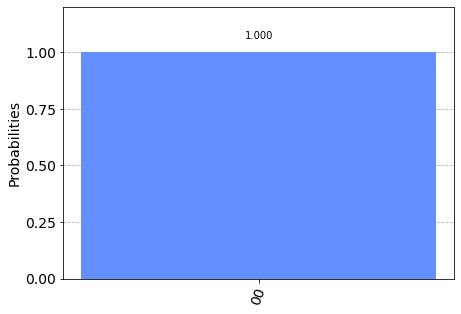

In [81]:
half_adder_00 = QuantumCircuit(4, 2)
#Input - 00

half_adder_00.barrier()

#Two CNOTs
half_adder_00.cx(0,2)
half_adder_00.cx(1,2)
#Toffoli for the special case
half_adder_00.ccx(0,1,3) #format - .ccx(first input bit, second input bit, output bit)

#second barrier
half_adder_00.barrier()

#measures
half_adder_00.measure(2,0)
half_adder_00.measure(3,1)

#let's execute
counts_ha = execute(half_adder_00,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_ha)

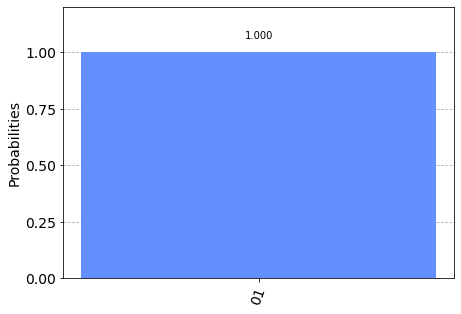

In [82]:
half_adder_10 = QuantumCircuit(4, 2)
#Input - 10
half_adder_10.x(1)

half_adder_10.barrier()

#Two CNOTs
half_adder_10.cx(0,2)
half_adder_10.cx(1,2)
#Toffoli for the special case
half_adder_10.ccx(0,1,3) #format - .ccx(first input bit, second input bit, output bit)

#second barrier
half_adder_10.barrier()

#measures
half_adder_10.measure(2,0)
half_adder_10.measure(3,1)

#let's execute
counts_ha = execute(half_adder_10,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_ha)

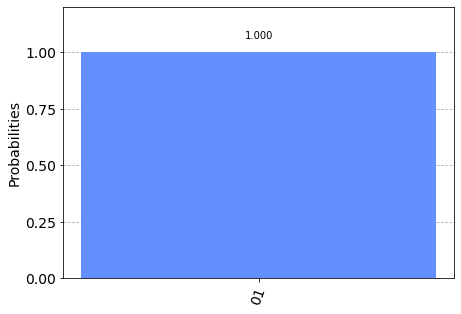

In [83]:
half_adder_01 = QuantumCircuit(4, 2)
#Input - 01
half_adder_01.x(0)


half_adder_01.barrier()

#Two CNOTs
half_adder_01.cx(0,2)
half_adder_01.cx(1,2)
#Toffoli for the special case
half_adder_01.ccx(0,1,3) #format - .ccx(first input bit, second input bit, output bit)

#second barrier
half_adder_01.barrier()

#measures
half_adder_01.measure(2,0)
half_adder_01.measure(3,1)

#let's execute
counts_ha = execute(half_adder_01,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_ha)

**Our Half-Adder works perfectly fine. This is the example of a Quantum Half Adder**

Thanks. Ajay 